# Housing Prices From 2011 to 2021
## Analysis
- Minnesota has seen a large increase in housing prices since 2021.
- The Twin Cities region has seen a 74.39% change since 2011, and the rest of Minnesota has seen a 55.55% increase. This 18.84% difference shows that the Twin Cities region has prices growing at a faster rate than the rest of the state, meaning that given enough time, this could make a notable difference in income to expenses ratios for the economic development regions.

## What does the FHFA HPI represent?
The FHFA HPI is a broad measure of the movement of single-family house prices. The FHFA HPI is a weighted, repeat-sales index, meaning that it measures average price changes in repeat sales or refinancings on the same properties. This information is obtained by reviewing repeat mortgage transactions on single-family properties whose mortgages have been purchased or securitized by Fannie Mae or Freddie Mac since January 1975.

The FHFA HPI serves as a timely, accurate indicator of house price trends at various geographic levels. Because of the breadth of the sample, it provides more information than is available in other house price indexes. It also provides housing economists with an improved analytical tool that is useful for estimating changes in the rates of mortgage defaults, prepayments and housing affordability in specific geographic areas.

In [1]:
# Import Dependencies
import os
import pandas as pd 
import csv
import matplotlib.pyplot as plt
import numpy as np

## HPI for State of Minnesota
This section shows what housing prices look like over time for the state as a whole. This is largely irrelevant to answering the main question, but it is interesting to see.

In [2]:
# Import CSV
csvpath = os.path.join(os.getcwd(), 'HPI_AT_BDL_state.csv')
house_price_index = pd.read_csv(csvpath)
house_price_index.head(10)

,HPI for states (All-Transactions Index)\nExperimental Indexes Showing Cumulative (Nominal) Annual Appreciation,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,* These annual state indexes should be conside...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"** For tracking and feedback purposes, please ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Last updated: March 24, 2022.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Not Seasonally Adjusted (NSA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,State,Abbreviation,FIPS,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base,NaN
6,Alabama,AL,01,1975,.,100.00,49.74,36.16,NaN
7,Alabama,AL,01,1976,6.70,106.70,53.08,38.58,NaN
8,Alabama,AL,01,1977,10.00,117.37,58.39,42.44,NaN
9,Alabama,AL,01,1978,8.38,127.21,63.28,46.00,NaN


In [3]:
# Drop unneeded text rows
house_price_index_nohead = house_price_index.drop([0, 1, 2, 3, 4])
house_price_index_nohead.head()


,HPI for states (All-Transactions Index)\nExperimental Indexes Showing Cumulative (Nominal) Annual Appreciation,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
5,State,Abbreviation,FIPS,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base,NaN
6,Alabama,AL,01,1975,.,100.00,49.74,36.16,NaN
7,Alabama,AL,01,1976,6.70,106.70,53.08,38.58,NaN
8,Alabama,AL,01,1977,10.00,117.37,58.39,42.44,NaN
9,Alabama,AL,01,1978,8.38,127.21,63.28,46.00,NaN


In [4]:
house_price_index_nohead.columns

Index(['HPI for states (All-Transactions Index)\nExperimental Indexes Showing Cumulative (Nominal) Annual Appreciation',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [5]:
# Rename columns to something more readable
house_price_index_nohead.rename(columns=house_price_index_nohead.iloc[0], inplace=True)
house_price_index_nohead.head()

,State,Abbreviation,FIPS,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base,NaN
5,State,Abbreviation,FIPS,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base,NaN
6,Alabama,AL,01,1975,.,100.00,49.74,36.16,NaN
7,Alabama,AL,01,1976,6.70,106.70,53.08,38.58,NaN
8,Alabama,AL,01,1977,10.00,117.37,58.39,42.44,NaN
9,Alabama,AL,01,1978,8.38,127.21,63.28,46.00,NaN


In [6]:
# Narrow parameters to just Minnesota
minnesota_hpi = house_price_index_nohead.loc[house_price_index_nohead["State"] == "Minnesota"]
minnesota_hpi.head()

,State,Abbreviation,FIPS,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base,NaN
1087,Minnesota,MN,27,1975,.,100.00,41.95,25.90,NaN
1088,Minnesota,MN,27,1976,8.82,108.82,45.65,28.18,NaN
1089,Minnesota,MN,27,1977,11.47,121.31,50.89,31.41,NaN
1090,Minnesota,MN,27,1978,17.49,142.53,59.79,36.91,NaN
1091,Minnesota,MN,27,1979,14.50,163.20,68.46,42.26,NaN


In [7]:
# Narrow the time span
minnesota_hpi_10_years = minnesota_hpi[(minnesota_hpi["Year"] > "2010") & (minnesota_hpi["Year"] <= "2021")]
minnesota_hpi_10_years

,State,Abbreviation,FIPS,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base,NaN
1123,Minnesota,MN,27,2011,-5.34,452.74,189.92,117.24,NaN
1124,Minnesota,MN,27,2012,-1.48,446.03,187.10,115.51,NaN
1125,Minnesota,MN,27,2013,3.99,463.85,194.58,120.12,NaN
1126,Minnesota,MN,27,2014,5.71,490.34,205.69,126.98,NaN
1127,Minnesota,MN,27,2015,3.31,506.56,212.50,131.18,NaN
1128,Minnesota,MN,27,2016,4.62,529.96,222.31,137.24,NaN
1129,Minnesota,MN,27,2017,5.83,560.85,235.27,145.24,NaN
1130,Minnesota,MN,27,2018,5.66,592.58,248.58,153.46,NaN
1131,Minnesota,MN,27,2019,4.05,616.58,258.64,159.67,NaN
1132,Minnesota,MN,27,2020,2.55,632.32,265.25,163.75,NaN


In [8]:
# Change HPI column to float, as it was causing issues with charting
minnesota_hpi_10_years["HPI"] = minnesota_hpi_10_years["HPI"].map(float)

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_46864/1817117878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minnesota_hpi_10_years["HPI"] = minnesota_hpi_10_years["HPI"].map(float)


In [9]:
# Find the percentage change from 2011 to 2021
all_first = minnesota_hpi_10_years.loc[1123]["HPI"]
all_last = minnesota_hpi_10_years.loc[1133]["HPI"]

all_percent_change = round(((all_last - all_first)/all_first)*100, 2)
print(all_percent_change)

53.01


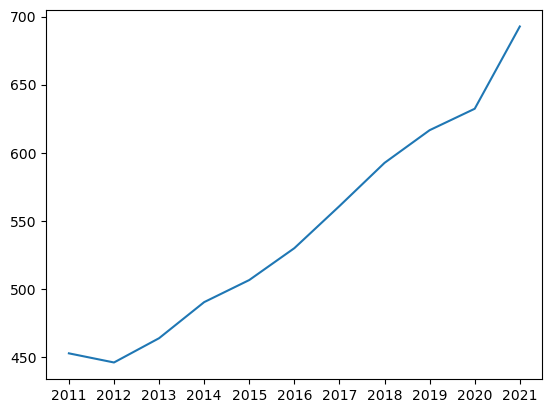

In [10]:
# Chart
x_axis = minnesota_hpi_10_years["Year"]
y_axis = minnesota_hpi_10_years["HPI"]
plt.plot(x_axis, y_axis)
plt.show()

## HPI for Minneapolis/St. Paul
In this section, we narrow down the data to data for the Twin Cities region only, so we are able to chart the difference near the end of the notebook. Here, we find that this region had a 74.39% increase in housing prices from 2011 to 2021.

In [11]:
# Import CSV
csvpath2 = os.path.join(os.getcwd(), 'HPI_AT_metro.csv')
msp_hpi_start = pd.read_csv(csvpath2, header=None)
headers = ["City", "ID", "Year", "Qtr", "HPI", "Annual Change %"]
msp_hpi_start.columns = headers
msp_hpi_start.head(10)

,City,ID,Year,Qtr,HPI,Annual Change %
0,"Abilene, TX",10180,1975,1,-,-
1,"Abilene, TX",10180,1975,2,-,-
2,"Abilene, TX",10180,1975,3,-,-
3,"Abilene, TX",10180,1975,4,-,-
4,"Abilene, TX",10180,1976,1,-,-
5,"Abilene, TX",10180,1976,2,-,-
6,"Abilene, TX",10180,1976,3,-,-
7,"Abilene, TX",10180,1976,4,-,-
8,"Abilene, TX",10180,1977,1,-,-
9,"Abilene, TX",10180,1977,2,-,-


In [12]:
# Narrow down to "Minneapolis-St. Paul-Bloomington"
msp_hpi_all = msp_hpi_start.loc[msp_hpi_start["City"] == "Minneapolis-St. Paul-Bloomington, MN-WI"]
msp_hpi_all.head()

,City,ID,Year,Qtr,HPI,Annual Change %
45410,"Minneapolis-St. Paul-Bloomington, MN-WI",33460,1975,1,-,-
45411,"Minneapolis-St. Paul-Bloomington, MN-WI",33460,1975,2,-,-
45412,"Minneapolis-St. Paul-Bloomington, MN-WI",33460,1975,3,-,-
45413,"Minneapolis-St. Paul-Bloomington, MN-WI",33460,1975,4,-,-
45414,"Minneapolis-St. Paul-Bloomington, MN-WI",33460,1976,1,-,-


In [13]:
# Change type of Year
msp_hpi_all["Year"] = msp_hpi_all["Year"].map(str)
msp_hpi_all.dtypes

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_46864/2555734627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msp_hpi_all["Year"] = msp_hpi_all["Year"].map(str)


City               object
ID                  int64
Year               object
Qtr                 int64
HPI                object
Annual Change %    object
dtype: object

In [14]:
# Narrow the time span
msp_hpi_10_years = msp_hpi_all[(msp_hpi_all["Year"] > "2010") & (msp_hpi_all["Year"] <= "2021")]
msp_hpi_10_years.head()

,City,ID,Year,Qtr,HPI,Annual Change %
45554,"Minneapolis-St. Paul-Bloomington, MN-WI",33460,2011,1,177.56,-0.39
45555,"Minneapolis-St. Paul-Bloomington, MN-WI",33460,2011,2,172.4,-0.39
45556,"Minneapolis-St. Paul-Bloomington, MN-WI",33460,2011,3,174.51,-0.37
45557,"Minneapolis-St. Paul-Bloomington, MN-WI",33460,2011,4,176.04,-0.36
45558,"Minneapolis-St. Paul-Bloomington, MN-WI",33460,2012,1,172.73,-0.36


In [15]:
# Grab only data for Quarter 4, since we are tracking change year over year, not quarter over quarter
msp_hpi_10_qtr_4 = msp_hpi_10_years.loc[msp_hpi_10_years["Qtr"] == 4]
msp_hpi_10_qtr_4

,City,ID,Year,Qtr,HPI,Annual Change %
45557,"Minneapolis-St. Paul-Bloomington, MN-WI",33460,2011,4,176.04,-0.36
45561,"Minneapolis-St. Paul-Bloomington, MN-WI",33460,2012,4,177.25,-0.37
45565,"Minneapolis-St. Paul-Bloomington, MN-WI",33460,2013,4,188.32,-0.44
45569,"Minneapolis-St. Paul-Bloomington, MN-WI",33460,2014,4,198.03,-0.45
45573,"Minneapolis-St. Paul-Bloomington, MN-WI",33460,2015,4,206.9,-0.48
45577,"Minneapolis-St. Paul-Bloomington, MN-WI",33460,2016,4,217.58,-0.47
45581,"Minneapolis-St. Paul-Bloomington, MN-WI",33460,2017,4,230.87,-0.52
45585,"Minneapolis-St. Paul-Bloomington, MN-WI",33460,2018,4,243.26,-0.54
45589,"Minneapolis-St. Paul-Bloomington, MN-WI",33460,2019,4,254.96,-0.53
45593,"Minneapolis-St. Paul-Bloomington, MN-WI",33460,2020,4,269.77,-0.55


In [16]:
# Change type of HPI for charting
msp_hpi_10_qtr_4["HPI"] = msp_hpi_10_qtr_4["HPI"].map(float)

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_46864/3188779113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msp_hpi_10_qtr_4["HPI"] = msp_hpi_10_qtr_4["HPI"].map(float)


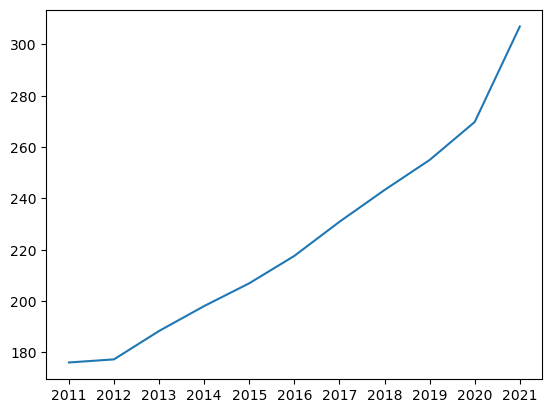

In [17]:
# Chart
x_axis = msp_hpi_10_qtr_4["Year"]
y_axis = msp_hpi_10_qtr_4["HPI"]

plt.plot(x_axis, y_axis)
plt.show()

## HPI for Nonmetro Minnesota
This section shows the changes in housing prices for nonmetro Minnesota. Here, we are able to see that the rest of Minnesota had a 55.55% increase in housing prices from 2011.

In [18]:
# Import CSV
csvpath3 = os.path.join(os.getcwd(), 'HPI_AT_nonmetro.csv')
greatermn_hpi_start = pd.read_csv(csvpath3, header=None)
greatermn_hpi_start.rename(columns=greatermn_hpi_start.iloc[2], inplace=True)
greatermn_hpi_start.head(10)

,State,Year,Quarter,Index,Standard Error
0,FHFA HPI® State Indexes for Houses \nnot in Me...,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,State,Year,Quarter,Index,Standard Error
3,AK,1995,1,100.00,( 0.00)
4,AK,1995,2,104.06,( 1.73)
5,AK,1995,3,102.53,( 1.43)
6,AK,1995,4,103.94,( 1.58)
7,AK,1996,1,107.87,( 1.52)
8,AK,1996,2,108.00,( 1.53)
9,AK,1996,3,109.33,( 1.64)


In [19]:
# Narrow down to MN only
greatermn_hpi_all = greatermn_hpi_start.loc[greatermn_hpi_start["State"] == "MN"]
greatermn_hpi_all.head()

,State,Year,Quarter,Index,Standard Error
2313,MN,1995,1,100.00,( 0.00)
2314,MN,1995,2,101.83,( 0.80)
2315,MN,1995,3,103.94,( 0.74)
2316,MN,1995,4,106.22,( 0.75)
2317,MN,1996,1,107.70,( 0.74)


In [20]:
# Narrow down time span
greatermn_hpi_10_years = greatermn_hpi_all[(greatermn_hpi_all["Year"] > "2010") & (greatermn_hpi_all["Year"] <= "2021")]
greatermn_hpi_10_years.dtypes

State             object
Year              object
Quarter           object
Index             object
Standard Error    object
dtype: object

In [21]:
# Find only Quarter 4 data, as we are tracking data year over year, not quarter over quarter
greatermn_hpi_10_qtr_4 = greatermn_hpi_10_years.loc[(greatermn_hpi_10_years["Quarter"] == "4")]
greatermn_hpi_10_qtr_4

,State,Year,Quarter,Index,Standard Error
2380,MN,2011,4,189.34,( 1.24)
2384,MN,2012,4,187.70,( 1.24)
2388,MN,2013,4,188.74,( 1.34)
2392,MN,2014,4,194.78,( 1.38)
2396,MN,2015,4,201.47,( 1.43)
2400,MN,2016,4,210.03,( 1.45)
2404,MN,2017,4,219.48,( 1.53)
2408,MN,2018,4,227.45,( 1.55)
2412,MN,2019,4,239.73,( 1.59)
2416,MN,2020,4,253.09,( 1.66)


In [22]:
# Change Index Type for charting
greatermn_hpi_10_qtr_4["Index"] = greatermn_hpi_10_qtr_4["Index"].map(float)

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_46864/1302453717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greatermn_hpi_10_qtr_4["Index"] = greatermn_hpi_10_qtr_4["Index"].map(float)


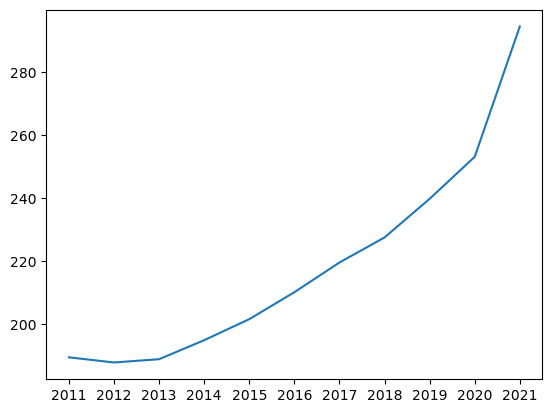

In [23]:
# Chart
x_axis = greatermn_hpi_10_qtr_4["Year"]
y_axis = greatermn_hpi_10_qtr_4["Index"]

plt.plot(x_axis, y_axis)
plt.show()

In [24]:
# Math to find percent changes
msp_first = msp_hpi_10_qtr_4.loc[45557]["HPI"]
msp_last = msp_hpi_10_qtr_4.loc[45597]["HPI"]

msp_percent_change = round(((msp_last - msp_first)/msp_first)*100, 2)
print(msp_percent_change)

greater_first = greatermn_hpi_10_qtr_4.loc[2380]["Index"]
greater_last = greatermn_hpi_10_qtr_4.loc[2420]["Index"]

greater_percent_change = round(((greater_last - greater_first)/greater_first)*100, 2)
print(greater_percent_change)

74.39
55.55


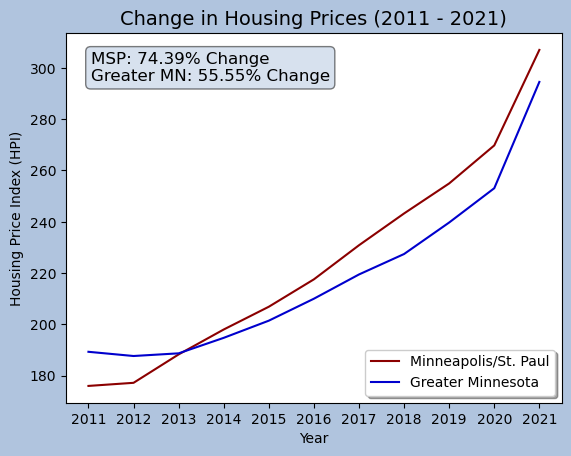

In [25]:
# Chart Together
fig, ax = plt.subplots()

msp_x_axis = msp_hpi_10_qtr_4["Year"]
msp_y_axis = msp_hpi_10_qtr_4["HPI"]
msp_line = plt.plot(msp_x_axis, msp_y_axis, color="darkred", label="Minneapolis/St. Paul")

greater_x_axis = greatermn_hpi_10_qtr_4["Year"]
greater_y_axis = greatermn_hpi_10_qtr_4["Index"]
greater_line = plt.plot(greater_x_axis, greater_y_axis, color="mediumblue", label="Greater Minnesota")

plt.legend(loc="lower right", shadow=True)
textstr = '\n'.join((f"MSP: {msp_percent_change}% Change", f"Greater MN: {greater_percent_change}% Change"))
props = dict(boxstyle="round", facecolor="lightsteelblue", alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12, verticalalignment="top", bbox=props)
plt.title("Change in Housing Prices (2011 - 2021)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Housing Price Index (HPI)")
fig.patch.set_facecolor("lightsteelblue")
plt.savefig("change_in_housing_prices.png")
plt.show()